# Data Description

### Codebook
* quality: a measure of the quality of the recorded video.
* bits: number of bits used to encode that block in the video stream.
* intra_parts: number sub-blocks inside this block that are not encoded by making use of
information in other frames.
* skip_parts: number sub-blocks inside this block that are straight-forward copied from another
frame.
* inter_16x16_parts: number of sub-blocks inside this block making use of information in other
frames and whose size is 16x16 pixels.
* inter_4x4_parts: number of sub-blocks inside this block making use of information in other
frames and whose size is 4x4 pixels.
* inter_other_parts: number of sub-blocks inside this block making use of information in other
frames and whose size is different from 16x16 and 4x4 pixels.
* non_zero_pixels: number of pixels different from 0 after encoding the block.
* frame_width: the width of the video frame in pixels.
* frame_height: the height of the video frame in pixels.
* movement_level: a measure of the level of movement of this frame with respect the previous
one.
* mean: mean of the pixels of the encoded block.
* sub_mean_1: mean of the pixels contained in the first 32x32 sub-bock of the current block.
* sub_mean_2: mean of the pixels contained in the second 32x32 sub-bock of the current block.
* sub_mean_3: mean of the pixels contained in the third 32x32 sub-bock of the current block.
* sub_mean_4: mean of the pixels contained in the fourth 32x32 sub-bock of the current block.
* var_sub_blocks: variance of the four previous values.
* sobel_h: mean of the pixels of the encoded block after applying the Sobel operator in
horizontal direction.
* sobel_v: mean of the pixels of the encoded block after applying the Sobel operator in vertical
direction.
* variance: variance of the pixels of the encoded block.
* block_movement_h: a measure of the movement of the current block in the horizontal
direction.
* block_movement_v: a measure of the movement of the current block in the vertical direction.
* var_movement_h: a measure of the variance of the movements inside the current block in the
horizontal direction.
* var_movement_v: a measure of the variance of the movements inside the current block in the
vertical direction.
* cost_1: a measure of the cost of encoding this block without partitioning it.
* cost_2: a measure of the cost of encoding this block without partitioning it and without
considering any movement in it.
* relevant: the target variable that indicates whether the current block is relevant (1) or not (0).

In [384]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [385]:
df = pd.read_csv('data.csv', sep=';')
print(df.isna().sum())
df  = df.dropna()
df.shape

quality               0
bits                  0
intra_parts           0
skip_parts            0
inter_16x16_parts     0
inter_4x4_parts       0
inter_other_parts     0
non_zero_pixels       0
frame_width           0
frame_height          0
movement_level        0
mean                  0
sub_mean_1            0
sub_mean_2            0
sub_mean_3           14
sub_mean_4            0
var_sub_blocks        0
sobel_h               0
sobel_v               0
variance              0
block_movement_h      0
block_movement_v      0
var_movement_h        0
var_movement_v        0
cost_1                0
cost_2               17
relevant              2
dtype: int64


(15967, 27)

<AxesSubplot:xlabel='frame_height'>

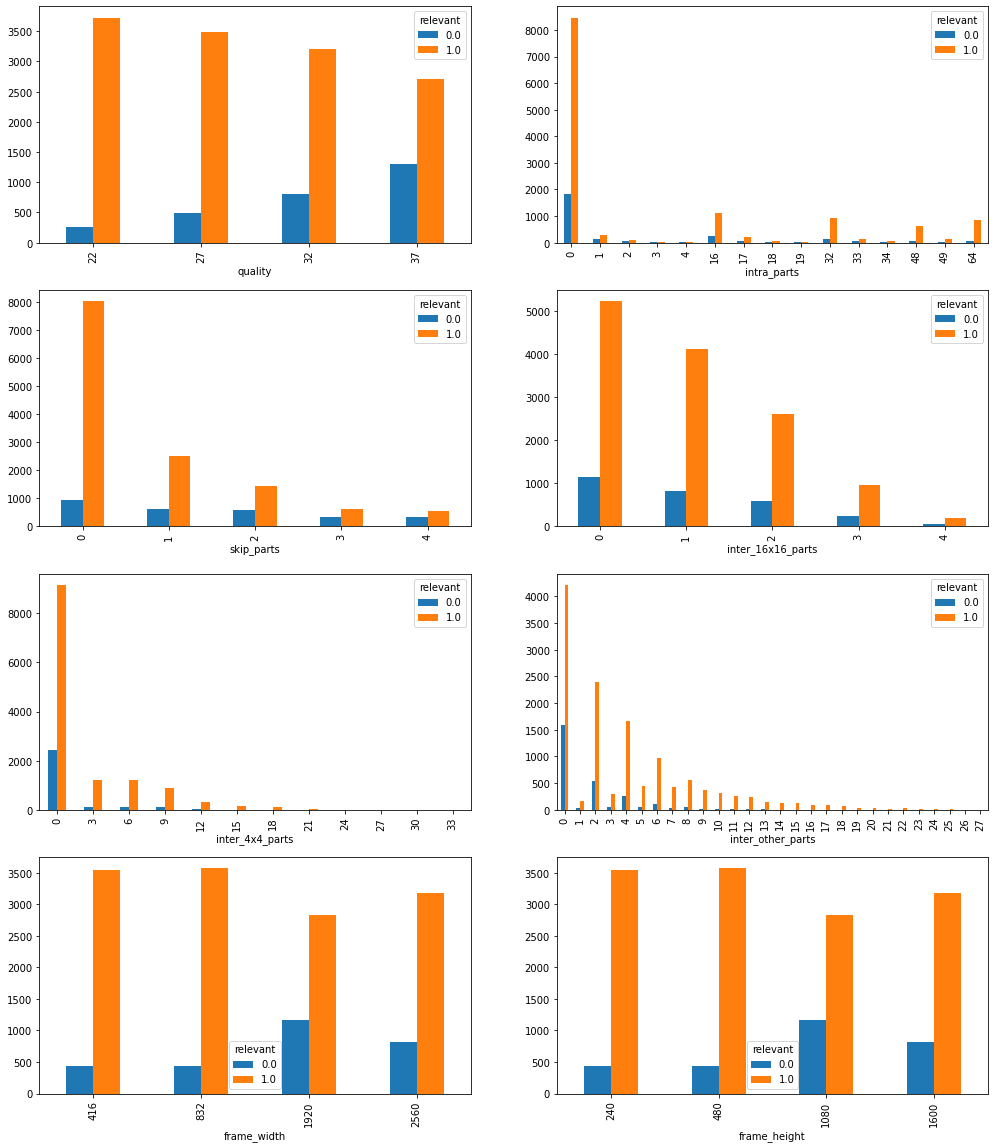

In [386]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(ncols=2, nrows=4,figsize=(17, 20))
pd.crosstab(df.quality, df.relevant).plot(kind='bar', ax=ax1)
pd.crosstab(df.intra_parts, df.relevant).plot(kind='bar', ax=ax2)
pd.crosstab(df.skip_parts, df.relevant).plot(kind='bar', ax=ax3)
pd.crosstab(df.inter_16x16_parts, df.relevant).plot(kind='bar', ax=ax4)
pd.crosstab(df.inter_4x4_parts, df.relevant).plot(kind='bar', ax=ax5)
pd.crosstab(df.inter_other_parts, df.relevant).plot(kind='bar', ax=ax6)
pd.crosstab(df.frame_width, df.relevant).plot(kind='bar', ax=ax7)
pd.crosstab(df.frame_height, df.relevant).plot(kind='bar', ax=ax8)

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15), (ax16, ax17, ax18)) = plt.subplots(ncols=3, nrows=6,figsize=(17, 20))
sns.boxplot(y=cont_rel.columns[0], x="relevant", data=df, ax=ax1)
sns.boxplot(y=cont_rel.columns[1],x="relevant", data=df, ax=ax2)
sns.boxplot(y=cont_rel.columns[2], x="relevant", data=df, ax=ax3)
sns.boxplot(y=cont_rel.columns[3], x="relevant", data=df, ax=ax4)
sns.boxplot(y=cont_rel.columns[4], x="relevant", data=df, ax=ax5)
sns.boxplot(y=cont_rel.columns[5], x="relevant", data=df, ax=ax6)
sns.boxplot(y=cont_rel.columns[6], x="relevant", data=df, ax=ax7)
sns.boxplot(y=cont_rel.columns[7], x="relevant", data=df, ax=ax8)
sns.boxplot(y=cont_rel.columns[8], x="relevant", data=df, ax=ax9)
sns.boxplot(y=cont_rel.columns[9], x="relevant", data=df, ax=ax10)
sns.boxplot(y=cont_rel.columns[10], x="relevant", data=df, ax=ax11)
sns.boxplot(y=cont_rel.columns[11], x="relevant", data=df, ax=ax12)
sns.boxplot(y=cont_rel.columns[12], x="relevant", data=df, ax=ax13)
sns.boxplot(y=cont_rel.columns[13], x="relevant", data=df, ax=ax14)
sns.boxplot(y=cont_rel.columns[14], x="relevant", data=df, ax=ax15)
sns.boxplot(y=cont_rel.columns[15], x="relevant", data=df, ax=ax16)
sns.boxplot(y=cont_rel.columns[16], x="relevant", data=df, ax=ax17)
sns.boxplot(y=cont_rel.columns[17], x="relevant", data=df, ax=ax18)

In [387]:
# The proportion of useful infomation per square
df["pixels_height_width"] = (df['frame_height']*df['frame_width'])/df['non_zero_pixels']
df = df.drop(['frame_height', 'frame_width', 'non_zero_pixels'], axis = 1)

In [388]:
# weighted variance of sub-blocks
df['sub_mean'] = (df['sub_mean_1']+ df['sub_mean_2'] + df['sub_mean_3'] +df['sub_mean_4'])/4
df = df.drop(['sub_mean_1', 'sub_mean_2', 'sub_mean_3', 'sub_mean_4'], axis=1)

In [389]:
# variability per block movement
#df['movement'] = (df['var_movement_h'] + df['var_movement_v'])/(df['block_movement_h'] + df['block_movement_v'])
df['movement_var'] = ((df['block_movement_h']/df['var_movement_h'])+(df['block_movement_v']/df['var_movement_v']))/2
df = df.drop(['block_movement_h', 'block_movement_v', 'var_movement_h', 'var_movement_v'], axis=1)

In [390]:
df['cost'] = (df['cost_1']+df['cost_2'])/2
df = df.drop(['cost_1', 'cost_2'], axis=1)

In [391]:
df['sobel'] = (df['sobel_h']+df['sobel_v'])/2
df = df.drop(['sobel_h', 'sobel_v'], axis=1)

In [392]:
df = df.drop(["inter_16x16_parts", "mean"], axis=1)

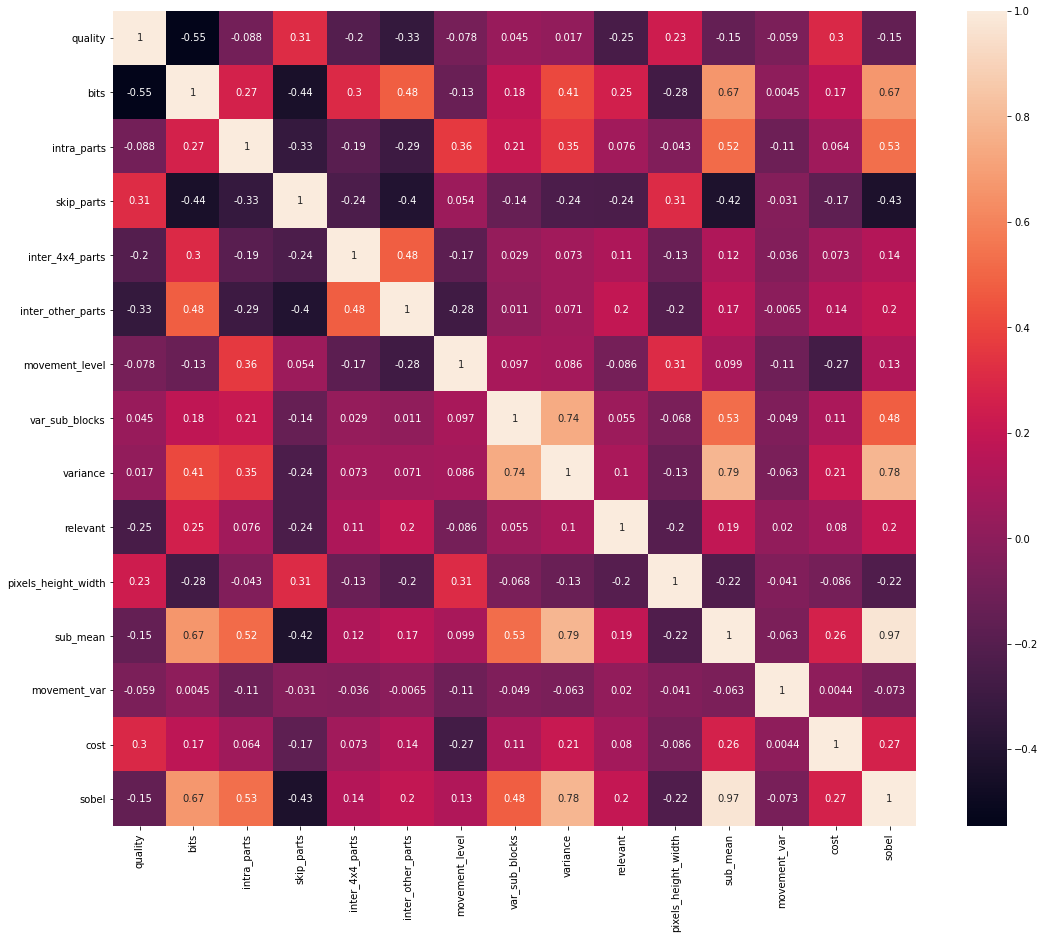

In [393]:
plt.figure(figsize=(18, 15))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [394]:
# deleting based on correlation pattern with other variables
df = df.drop(["var_sub_blocks", "sub_mean", "movement_var"], axis=1) # maybe remove "sobel" too

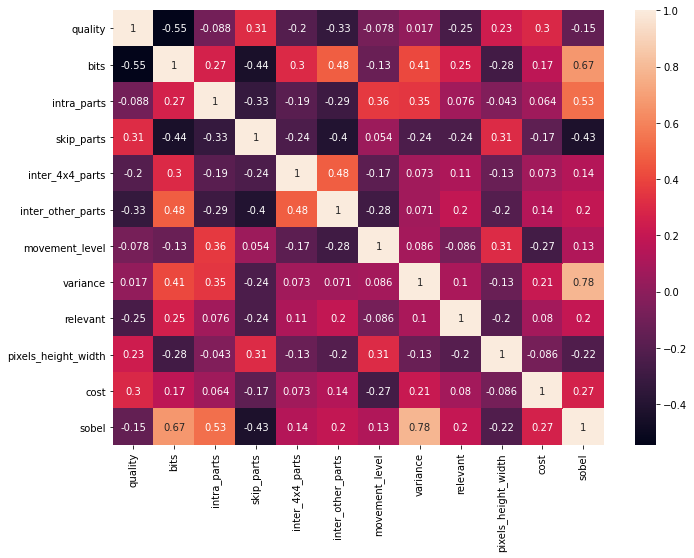

In [395]:
plt.figure(figsize=(11, 8))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [396]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quality,15967.0,2.951112e+01,5.589634e+00,22.000000,27.000000,32.000000,3.700000e+01,3.700000e+01
bits,15967.0,4.492800e+02,5.488323e+02,0.000000,71.000000,243.000000,6.210000e+02,4.771000e+03
intra_parts,15967.0,1.102868e+01,1.904291e+01,0.000000,0.000000,0.000000,1.600000e+01,6.400000e+01
skip_parts,15967.0,8.498152e-01,1.182036e+00,0.000000,0.000000,0.000000,1.000000e+00,4.000000e+00
inter_4x4_parts,15967.0,1.976765e+00,3.899996e+00,0.000000,0.000000,0.000000,3.000000e+00,3.300000e+01
inter_other_parts,15967.0,3.684286e+00,4.442187e+00,0.000000,0.000000,2.000000,6.000000e+00,2.700000e+01
movement_level,15967.0,4.029269e+06,4.444461e+06,31645.000000,240975.000000,528973.000000,6.599839e+06,1.227660e+07
variance,15967.0,5.332723e+01,1.073384e+02,0.000000,1.411474,14.461300,5.244963e+01,2.022198e+03
relevant,15967.0,8.220705e-01,3.824653e-01,0.000000,1.000000,1.000000,1.000000e+00,1.000000e+00
pixels_height_width,15967.0,inf,NaN,153.836672,4992.000000,41795.918367,3.413333e+05,inf


In [397]:
df.nunique()

quality                    4
bits                    2104
intra_parts               15
skip_parts                 5
inter_4x4_parts           12
inter_other_parts         28
movement_level           205
variance               11971
relevant                   2
pixels_height_width     1432
cost                   15175
sobel                  11337
dtype: int64

In [398]:
df['intra_parts'].unique()

array([ 0, 16, 32,  1, 48, 17,  2,  4, 33, 64, 34,  3, 49, 19, 18],
      dtype=int64)

In [399]:
df['quality'].unique()

array([22, 27, 32, 37], dtype=int64)

In [400]:
df['relevant'].value_counts()

1.0    13126
0.0     2841
Name: relevant, dtype: int64

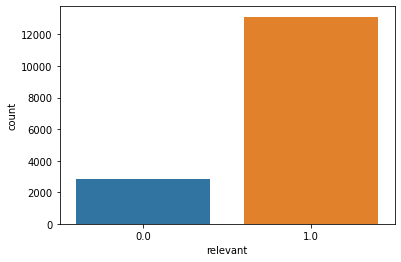

In [401]:
sns.countplot(x='relevant', data=df)
plt.show()

In [402]:
#Check variables relation

cat = df.loc[:, df.nunique() < 30]
cont = df.loc[:, df.nunique() >= 30]

In [403]:
cat.groupby('relevant').mean()

,quality,intra_parts,skip_parts,inter_4x4_parts,inter_other_parts
relevant,,,,,
0.0,32.519183,7.931362,1.463569,1.021119,1.81415
1.0,28.860049,11.699071,0.716974,2.183605,4.08906


<AxesSubplot:xlabel='inter_other_parts'>

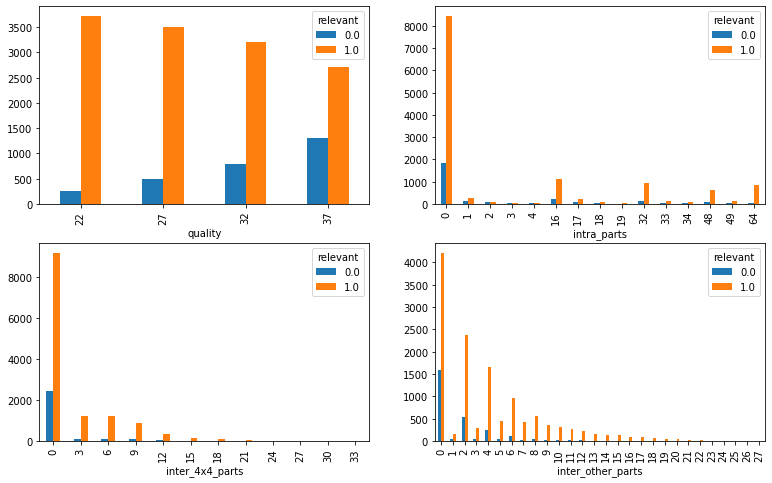

In [407]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2,figsize=(13, 8))
pd.crosstab(df.quality, df.relevant).plot(kind='bar', ax=ax1)
pd.crosstab(df.intra_parts, df.relevant).plot(kind='bar', ax=ax2)
#pd.crosstab(df.skip_parts, df.relevant).plot(kind='bar', ax=ax3)
#pd.crosstab(df.inter_16x16_parts, df.relevant).plot(kind='bar', ax=ax4)
pd.crosstab(df.inter_4x4_parts, df.relevant).plot(kind='bar', ax=ax3)
pd.crosstab(df.inter_other_parts, df.relevant).plot(kind='bar', ax=ax4)
#pd.crosstab(df.frame_width, df.relevant).plot(kind='bar', ax=ax7)
#pd.crosstab(df.frame_height, df.relevant).plot(kind='bar', ax=ax8)

In [408]:
lst = cont.columns.tolist()
lst.append('relevant')
cont_rel = df[lst]
cont_rel.groupby('relevant').mean()

,bits,movement_level,variance,pixels_height_width,cost,sobel
relevant,,,,,,
0.0,151.430834,4.855167e+06,29.596506,inf,32647.388772,4.197873
1.0,513.746610,3.850511e+06,58.463528,inf,41028.947014,8.999038


Text(0, 0.5, 'Frequency')

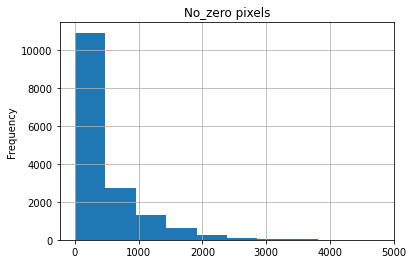

In [410]:
cont_rel.bits.hist()
plt.title('No_zero pixels')
plt.ylabel('Frequency')

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


<AxesSubplot:xlabel='relevant', ylabel='cost'>

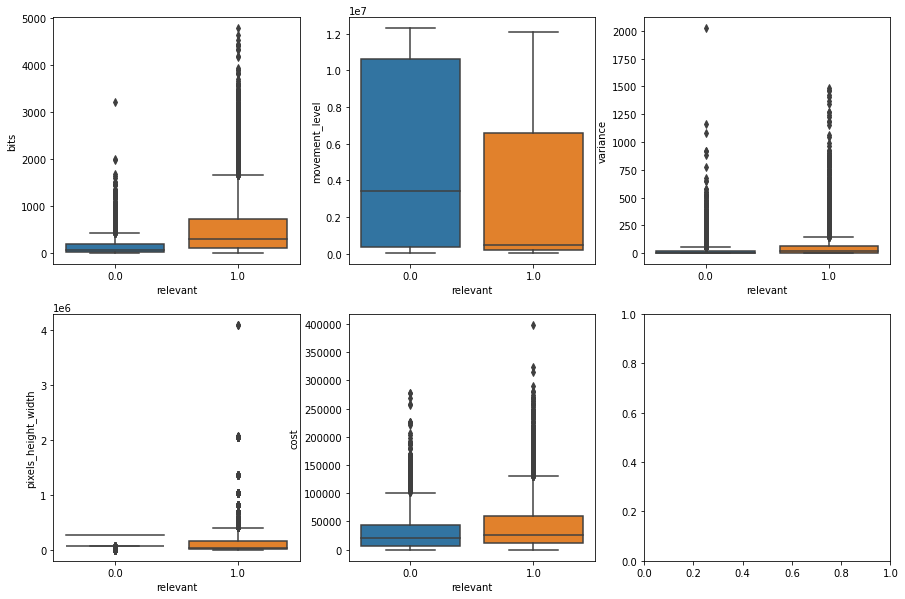

In [417]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(ncols=3, nrows=2,figsize=(15, 10))
sns.boxplot(y=cont_rel.columns[0], x="relevant", data=df, ax=ax1)
sns.boxplot(y=cont_rel.columns[1],x="relevant", data=df, ax=ax2)
sns.boxplot(y=cont_rel.columns[2], x="relevant", data=df, ax=ax3)
sns.boxplot(y=cont_rel.columns[3], x="relevant", data=df, ax=ax4)
sns.boxplot(y=cont_rel.columns[4], x="relevant", data=df, ax=ax5)

In [418]:
# Checking if all the sub-groups (relevant=0 and relevant=1) of variables are statistically different from each other

In [419]:
from scipy.stats import ttest_rel
from statsmodels.stats.stattools import jarque_bera
import random

In [420]:
def equality_testing(df, variables, y):
    
    def check_normality(var):
            normality = jarque_bera(var)
            if float(normality[1]) < 0.5:
                print(" violates the normality!")
    

    for el in variables:
        zero_y = df.loc[df[y] == 0][el].tolist()
        one_y = df.loc[df[y] == 1][el].tolist()
        print(el.upper())
        sample_size = max(len(zero_y), len(one_y))
        zero_y = random.choices(zero_y, k = sample_size)
        one_y = random.choices(one_y, k = sample_size)
        check_normality(zero_y)
        check_normality(one_y)
        
        if ttest_rel(zero_y, one_y).pvalue >=0.5:
            print("!!!The groups related to 1 or 0 have the same mean :" + el) 
        else:
            print("!!!The groups related to 1 or 0 are different :" + el)

In [421]:
equality_testing(cont_rel, cont_rel.columns[:-1].tolist(), cont_rel.columns[-1])

BITS
 violates the normality!
 violates the normality!
!!!The groups related to 1 or 0 are different :bits
MOVEMENT_LEVEL
 violates the normality!
 violates the normality!
!!!The groups related to 1 or 0 are different :movement_level
VARIANCE
 violates the normality!
 violates the normality!
!!!The groups related to 1 or 0 are different :variance
PIXELS_HEIGHT_WIDTH
!!!The groups related to 1 or 0 are different :pixels_height_width
COST
 violates the normality!
 violates the normality!
!!!The groups related to 1 or 0 are different :cost
SOBEL
 violates the normality!
 violates the normality!
!!!The groups related to 1 or 0 are different :sobel


c:\users\user\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\stats.py:1082: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - np.expand_dims(np.mean(a, axis), axis)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\stats.py:5756: RuntimeWarning: invalid value encountered in subtract
  d = (a - b).astype(np.float64)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


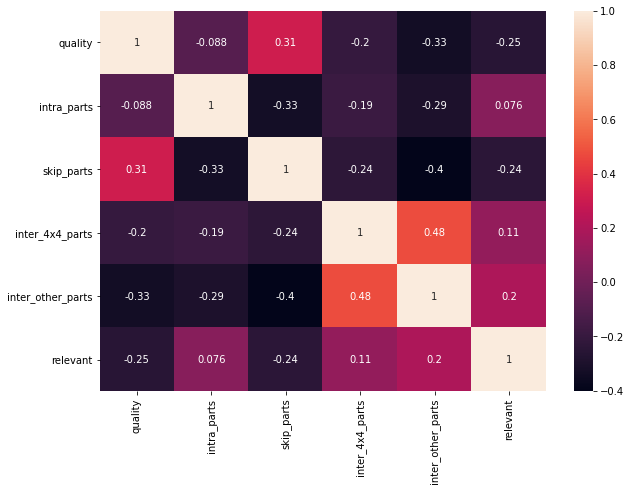

In [422]:
plt.figure(figsize=(10, 7))
corrMatrix = cat.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [423]:
# feels like we need to remove inter_16x16_parts

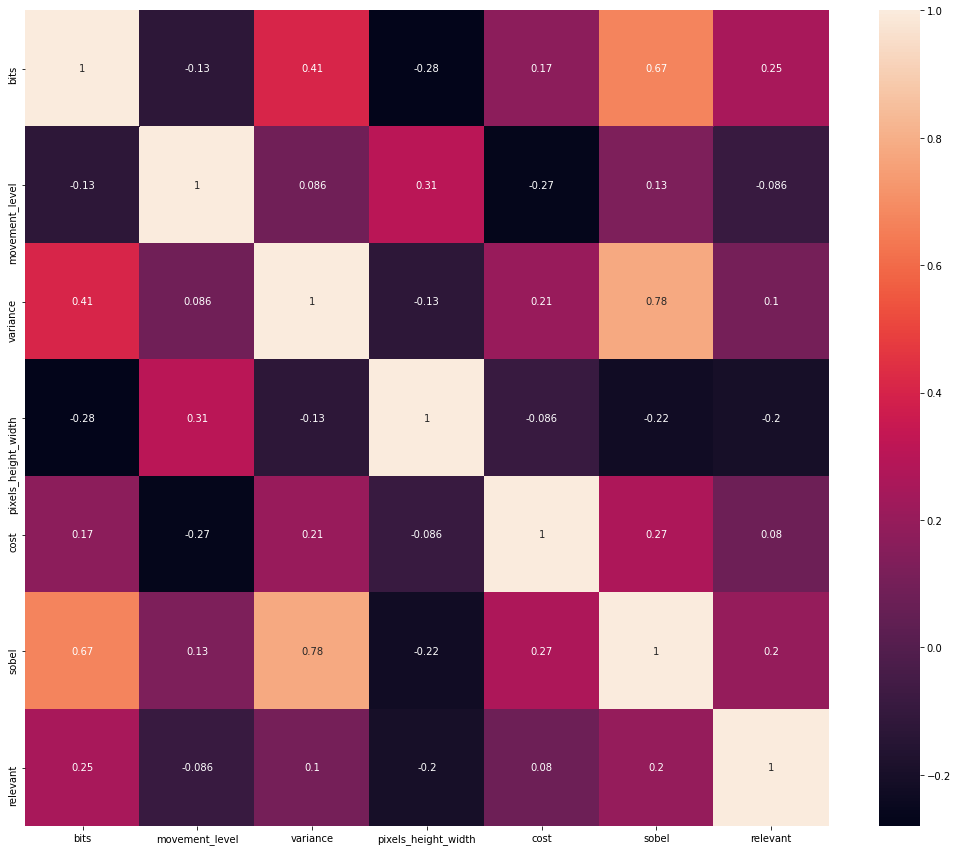

In [424]:
plt.figure(figsize=(18, 15))
corrMatrix = cont_rel.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [425]:
# feels like we need to remove: mean, block_movement_h, var_movement_h, var_movement_v maybe also var_sub_blocks

# END OF DATA DESCRIPTION

In [426]:
# Data Preprocessing




In [427]:
# The column that has less than 200 different values is considered to have categorical data
cat = df.loc[:, df.nunique() < 200]
cont = df.loc[:, df.nunique() >= 200]

In [428]:
# Normalization of continuous data

In [429]:
cont.head()

,bits,movement_level,variance,pixels_height_width,cost,sobel
0,2143,42352,87.584335,247.128713,0.0,17.397461
1,1735,42352,48.025330,262.047244,8808.5,14.330078
2,1971,42352,56.613480,217.043478,5148.5,14.578125
3,2473,42352,283.079285,237.149644,20666.5,25.445312
4,1093,42352,175.123245,597.844311,14811.0,13.141602


In [430]:
for var in cont.columns:
    cont[var] = cont[var].apply(lambda x:  x / df[var].max())

<ipython-input-430-917577775497>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cont[var] = cont[var].apply(lambda x:  x / df[var].max())


In [431]:
cont.head()

,bits,movement_level,variance,pixels_height_width,cost,sobel
0,0.449172,0.00345,0.043311,0.0,0.000000,0.273892
1,0.363655,0.00345,0.023749,0.0,0.022100,0.225601
2,0.413121,0.00345,0.027996,0.0,0.012917,0.229506
3,0.518340,0.00345,0.139986,0.0,0.051852,0.400590
4,0.229092,0.00345,0.086600,0.0,0.037160,0.206891


In [432]:
# Categorical data transofmations:

In [433]:
cat.head()

,quality,intra_parts,skip_parts,inter_4x4_parts,inter_other_parts,relevant
0,22,0,0,3,21,1.0
1,22,0,2,3,8,1.0
2,22,0,0,0,8,1.0
3,22,0,0,18,20,1.0
4,22,0,0,3,8,1.0


In [434]:
from sklearn.preprocessing import LabelEncoder
#This technique has a drawback that it gives the highest priority due to its label
# lowest priority for its label being 0.
encode = LabelEncoder()

for el in cat.columns:
    encode.fit(cat[el])
    cat[el] = encode.transform(cat[el])

<ipython-input-434-53edec57b234>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat[el] = encode.transform(cat[el])


In [435]:
cat.head()

,quality,intra_parts,skip_parts,inter_4x4_parts,inter_other_parts,relevant
0,0,0,0,1,21,1
1,0,0,2,1,8,1
2,0,0,0,0,8,1
3,0,0,0,6,20,1
4,0,0,0,1,8,1


In [436]:
# from sklearn.preprocessing import OneHotEncoder

# hot = OneHotEncoder()
# hotcat = pd.DataFrame(hot.fit_transform(cat[['frame_width', 'frame_height']]))
# cat = pd.concat([cat, hotcat], axis=1)
# cat = cat.drop(['frame_width', 'frame_height'], axis=1)

In [437]:
cat.head()

,quality,intra_parts,skip_parts,inter_4x4_parts,inter_other_parts,relevant
0,0,0,0,1,21,1
1,0,0,2,1,8,1
2,0,0,0,0,8,1
3,0,0,0,6,20,1
4,0,0,0,1,8,1


In [438]:
# First version

In [439]:
df = pd.concat([cont, cat], axis=1)

In [443]:
df.head()
df.to_csv("tryMe.csv")

In [441]:
# Removing based on observations: mean, block_movement_h, var_movement_h, var_movement_v maybe, var_sub_blocks, inter_16x16_parts
#df2 = df.drop(['mean', 'block_movement_h', 'var_movement_h', 'var_movement_v', 'var_sub_blocks', 'inter_16x16_parts'], axis=1)

In [442]:
#df2.head()

NameError: name 'df2' is not defined

# This is our final selection preprocessing steps (I hope), BUT WITH NO FINAL DATA REMOVALS which we need to do

# Draft

In [42]:
def equality_testing(df, variables, y):
    
    def check_normality(d, var):
        norm_var = var 
        for v in var:
            normality = jarque_bera(d[v])
            if float(normality[1]) < 0.5:
                #norm_var.remove(v)
                print(v + " violates the normality!")
        return norm_var
    
    selected_var = check_normality(df, variables)

    for el in selected_var:
        zero_y = df.loc[df[y] == 0][el].tolist()
        one_y = df.loc[df[y] == 1][el].tolist()
        
        
        sample_size = max(len(zero_y), len(one_y))
        
        
        if ttest_rel(random.choices(zero_y, k = sample_size), random.choices(one_y, k = sample_size)).pvalue >=0.5:
            print("!!!The groups related to 1 or 0 have the same mean :" + el) 
        else:
            print("!!!The groups related to 1 or 0 are different :" + el)